# Dataset League of Legends
![Texto alternativo](https://images.contentstack.io/v3/assets/blt731acb42bb3d1659/blt45d6c2043ff36e28/5e21837f146ca8115b2d3332/Champion-List.jpg)

## Contexto
El siguiente dataset corresponde datos de partidas del juevo en línea League of Legends. Este es un MOBA (campo de batalla multijugador en línea) donde se enfrentan 2 equipos (azul y rojo). Hay 3 carriles, una jungla y 5 roles. Donde el objetivo es acabar con el Nexus enemigo (base enemiga) para ganar el juego. Este dataset puede encontrarse en el siguiente enlace: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min?select=high_diamond_ranked_10min.csv
El conjunto de datos a manejar corresponde a los primeros 10 minutos de aproximadamente 10k partidas clasificadas (SOLO QUEUE) de un ELO alto (DIAMOND I a MASTER). Estos ELOS utilizados son gracias a que los jugadores tienen aproximadamente el mismo nivel.
Los datos corresponden a las acciones tomadas por los jugadores duarante esos 10 minutos ya sea en la cantdad asesinatos, muertes, oro, experiencia, nivel, centinelas puestos en el cambio y muchos mas. Un dato muy importante del dataset es bluewins que como su nombre indica hace referencia a que el equipo azul gano o no esa partida. Estos datos fueron recopilados en abril del 2020 en la temporada actual que tiene el juego.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

dataframe_partidas_lol = pd.read_csv('high_diamond_ranked_10min.csv')

# Preguntas

#### 1. ¿Cuál es el marcador en asesinatos, muertes y asistencias más común del equipo azul?

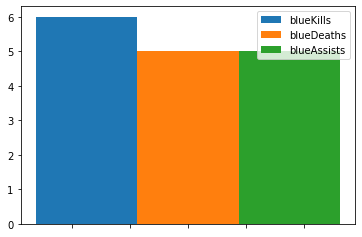

In [192]:
df_blue_mode = dataframe_partidas_lol.loc[:,['blueKills','blueDeaths','blueAssists']].mode()

x = np.arange(len(df_blue_mode.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width, df_blue_mode.blueKills, width, label='blueKills')
rects2 = ax.bar(x, df_blue_mode.blueDeaths, width, label='blueDeaths')
rects3 = ax.bar(x + width, df_blue_mode.blueAssists, width, label='blueAssists')

 
ax.set_xticklabels(df_blue_mode.index)
ax.legend()

plt.show()

#### 2. ¿Cuál es el promedio del control de visión del equipo azul en wards plantados y wards enemigos destruidos?

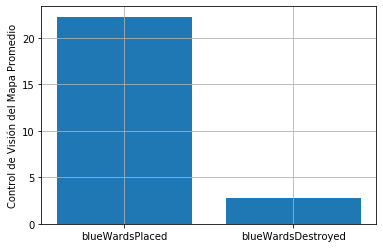

In [36]:
df_control_vision = dataframe_partidas_lol.loc[:,['blueWardsPlaced','blueWardsDestroyed']].mean()

fig, ax = plt.subplots()
ax.bar(df_control_vision.index,df_control_vision.values)
ax.set_ylabel('Control Promedio de Visión del Mapa')
ax.grid(True)

plt.show()

#### 3. ¿Cuál es la relación entre ganar un partida y la cantidad de torres destruidas antes del minuto 10 para el quipo azul?

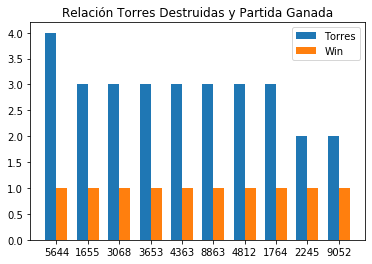

In [94]:
df_towers = dataframe_partidas_lol.sort_values('blueTowersDestroyed',ascending=False)
df_towers = df_towers.head(10)
df_towers = df_towers.loc[:,['blueWins','blueTowersDestroyed']]

x = np.arange(len(df_towers.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_towers.blueTowersDestroyed, width, label='Torres')
rects2 = ax.bar(x + width/2, df_towers.blueWins, width, label='Win')
 
ax.set_title('Relación Torres Destruidas y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_towers.index)
ax.legend()

plt.show()

#### 4. ¿Cuál es el promedio de control de objetivos del equipo azul en realizar Dragones y Heraldos?

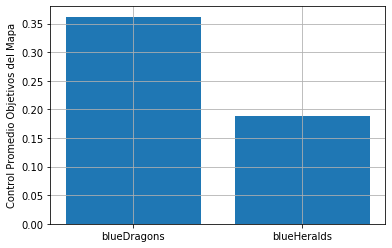

In [85]:
df_objetivos = dataframe_partidas_lol.loc[:,['blueDragons','blueHeralds']].mean()

fig, ax = plt.subplots()
ax.bar(df_objetivos.index,df_objetivos.values)
ax.set_ylabel('Control Promedio Objetivos del Mapa')
ax.grid(True)

#### 5. ¿Cuál es el promedio de farmeo del equipo azul en minions de carril y minions de jungla en los primero 10 minutos de partida? 

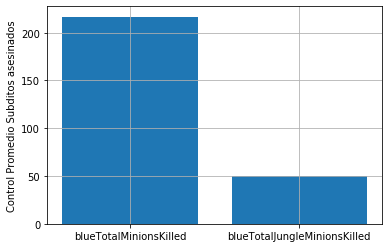

In [88]:
df_minions = dataframe_partidas_lol.loc[:,['blueTotalMinionsKilled','blueTotalJungleMinionsKilled']].mean()

fig, ax = plt.subplots()
ax.bar(df_minions.index,df_minions.values)
ax.set_ylabel('Control Promedio Subditos asesinados')
ax.grid(True)

#### 6. ¿Cuáles son las 10 mejores partidas del equipo azul con respecto a la diferencia de oro y de experiencia acumulados en tan solo 10 minutos de juego? 

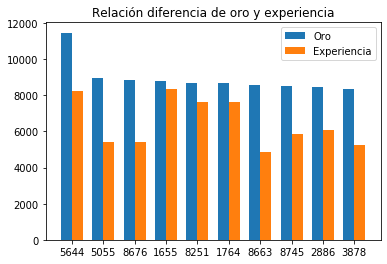

In [125]:
df_diff = dataframe_partidas_lol.sort_values(['blueGoldDiff','blueExperienceDiff'],ascending=False)
df_diff = df_diff.head(10)
df_diff = df_diff.loc[:,['blueGoldDiff','blueExperienceDiff']]

x = np.arange(len(df_diff.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_diff.blueGoldDiff, width, label='Oro')
rects2 = ax.bar(x + width/2, df_diff.blueExperienceDiff, width, label='Experiencia')
 
ax.set_title('Relación diferencia de oro y experiencia')
ax.set_xticks(x)
ax.set_xticklabels(df_diff.index)
ax.legend()

plt.show()

#### 7. ¿Cuáles son las 10 mejores partidas del equipo azul con el promedio de jugadores mas alto?

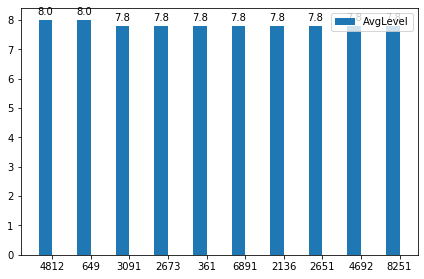

In [158]:
df_avg = dataframe_partidas_lol.sort_values('blueAvgLevel',ascending=False)
df_avg = df_avg.head(10)
df_avg = df_avg.loc[:,['blueAvgLevel']]

x = np.arange(len(df_avg.index))

width = 0.35
 
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, df_avg.blueAvgLevel, width, label='AvgLevel')
ax.set_xticks(x)
ax.set_xticklabels(df_avg.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
fig.tight_layout()

plt.show()

#### 8. ¿Cuál es la relación entre ganar un partida y las 10 peores recolecciones de oro por minuto para el equipo azul?

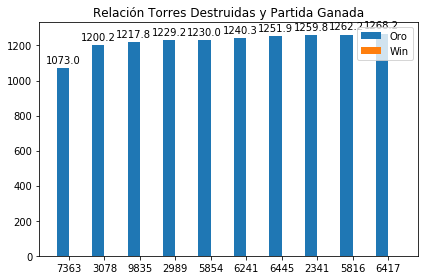

In [155]:
df_gold = dataframe_partidas_lol.sort_values('blueGoldPerMin',ascending=True)
df_gold = df_gold.head(10)
df_gold = df_gold.loc[:,['blueWins','blueGoldPerMin']]
df_gold

x = np.arange(len(df_gold.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_gold.blueGoldPerMin, width, label='Oro')
rects2 = ax.bar(x + width/2, df_gold.blueWins * 100, width, label='Win')
 
ax.set_title('Relación Torres Destruidas y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_gold.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
fig.tight_layout()

plt.show()

#### 9. ¿Cuál es la relación entre ganar un partida y hacer objetivos durante los 10 primero minutos de la partida para el equipo azul?

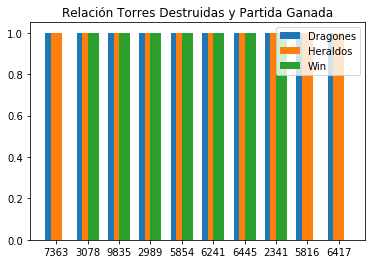

In [168]:
df_obj_win = dataframe_partidas_lol.sort_values(['blueDragons','blueHeralds'],ascending=False)
df_obj_win = df_obj_win.head(10)
df_obj_win = df_obj_win.loc[:,['blueWins','blueDragons','blueHeralds']]
df_obj_win

x = np.arange(len(df_obj_win.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_obj_win.blueDragons, width, label='Dragones')
rects2 = ax.bar(x, df_obj_win.blueHeralds, width, label='Heraldos')
rects3 = ax.bar(x + width/2, df_obj_win.blueWins, width, label='Win')
 
ax.set_title('Relación Torres Destruidas y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_gold.index)
ax.legend()

plt.show()

#### 10. ¿Cuál es la relación entre ganar un partida y el CS (Creep Score) del equipo azul?

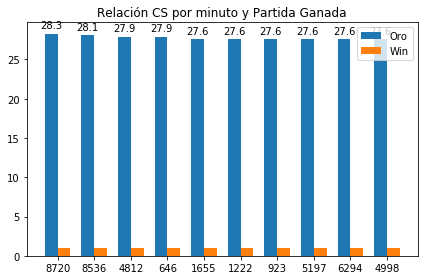

In [169]:
df_cs = dataframe_partidas_lol.sort_values(['blueCSPerMin'],ascending=False)
df_cs = df_cs.head(10)
df_cs = df_cs.loc[:,['blueWins','blueCSPerMin']]

x = np.arange(len(df_cs.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_cs.blueCSPerMin, width, label='Oro')
rects2 = ax.bar(x + width/2, df_cs.blueWins, width, label='Win')
 
ax.set_title('Relación CS por minuto y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_cs.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
fig.tight_layout()

plt.show()

#### 11. ¿Cuál es el marcador en asesinatos, muertes y asistencias más común del equipo rojo?

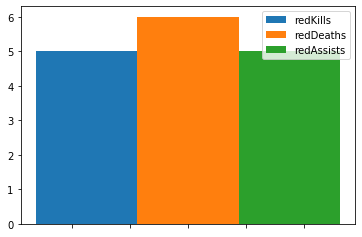

In [194]:
df_red_mode = dataframe_partidas_lol.loc[:,['redKills','redDeaths','redAssists']].mode()

x = np.arange(len(df_red_mode.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width, df_red_mode.redKills, width, label='redKills')
rects2 = ax.bar(x, df_red_mode.redDeaths, width, label='redDeaths')
rects3 = ax.bar(x + width, df_red_mode.redAssists, width, label='redAssists')

 
ax.set_xticklabels(df_red_mode.index)
ax.legend()

plt.show()

#### 12. ¿Cuál es el promedio del control de visión del equipo rojo en wards plantados y wards enemigos destruidos?

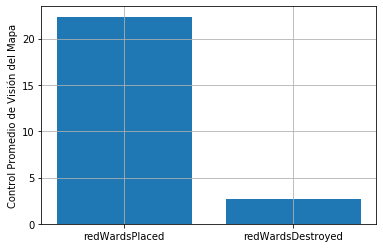

In [195]:
df_control_vision = dataframe_partidas_lol.loc[:,['redWardsPlaced','redWardsDestroyed']].mean()

fig, ax = plt.subplots()
ax.bar(df_control_vision.index,df_control_vision.values)
ax.set_ylabel('Control Promedio de Visión del Mapa')
ax.grid(True)

plt.show()

#### 13. ¿Cuál es la relación entre ganar un partida y la cantidad de torres destruidas antes del minuto 10 para el quipo rojo?

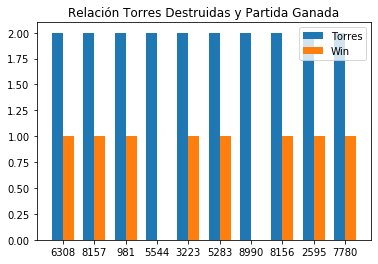

In [238]:
df_towers = dataframe_partidas_lol.sort_values('redTowersDestroyed',ascending=False)
df_towers = df_towers.head(10)
df_towers = df_towers.loc[:,['blueWins','redTowersDestroyed']]
df_towers.blueWins = df_towers.blueWins.replace({0:1,1:0})


x = np.arange(len(df_towers.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_towers.redTowersDestroyed, width, label='Torres')
rects2 = ax.bar(x + width/2, df_towers.blueWins, width, label='Win')
 
ax.set_title('Relación Torres Destruidas y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_towers.index)
ax.legend()

plt.show()

#### 14. ¿Cuál es el promedio de control de objetivos del equipo rojo en realizar Dragones y Heraldos?

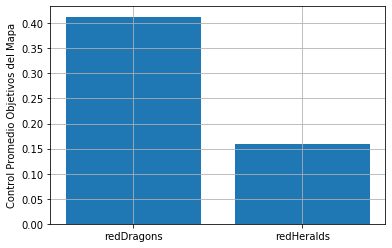

In [203]:
df_objetivos = dataframe_partidas_lol.loc[:,['redDragons','redHeralds']].mean()

fig, ax = plt.subplots()
ax.bar(df_objetivos.index,df_objetivos.values)
ax.set_ylabel('Control Promedio Objetivos del Mapa')
ax.grid(True)

#### 15. ¿Cuál es el promedio de farmeo del equipo rojo en minions de carril y minions de jungla en los primero 10 minutos de partida? 

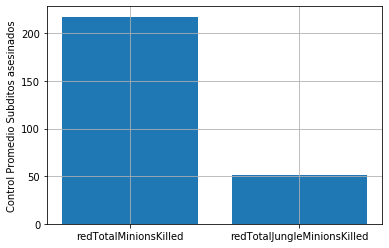

In [204]:
df_minions = dataframe_partidas_lol.loc[:,['redTotalMinionsKilled','redTotalJungleMinionsKilled']].mean()

fig, ax = plt.subplots()
ax.bar(df_minions.index,df_minions.values)
ax.set_ylabel('Control Promedio Subditos asesinados')
ax.grid(True)

#### 16. ¿Cuáles son las 10 mejores partidas del equipo rojo con respecto a la diferencia de oro y de experiencia acumulados en tan solo 10 minutos de juego? 

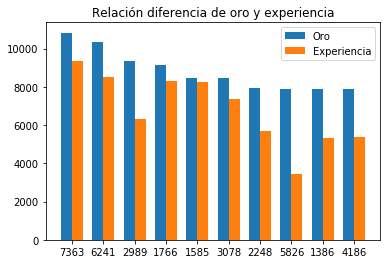

In [206]:
df_diff = dataframe_partidas_lol.sort_values(['redGoldDiff','redExperienceDiff'],ascending=False)
df_diff = df_diff.head(10)
df_diff = df_diff.loc[:,['redGoldDiff','redExperienceDiff']]

x = np.arange(len(df_diff.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_diff.redGoldDiff, width, label='Oro')
rects2 = ax.bar(x + width/2, df_diff.redExperienceDiff, width, label='Experiencia')
 
ax.set_title('Relación diferencia de oro y experiencia')
ax.set_xticks(x)
ax.set_xticklabels(df_diff.index)
ax.legend()

plt.show()

#### 17. ¿Cuáles son las 10 mejores partidas del equipo rojo con el promedio de jugadores mas alto?

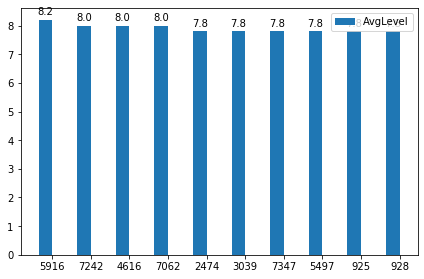

In [237]:
df_avg = dataframe_partidas_lol.sort_values('redAvgLevel',ascending=False)
df_avg = df_avg.head(10)
df_avg = df_avg.loc[:,['redAvgLevel']]

x = np.arange(len(df_avg.index))

width = 0.35
 
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, df_avg.redAvgLevel, width, label='AvgLevel')
ax.set_xticks(x)
ax.set_xticklabels(df_avg.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
fig.tight_layout()

plt.show()

#### 18. ¿Cuál es la relación entre ganar un partida y las 10 mejores recolecciones de oro por minuto para el equipo rojo?

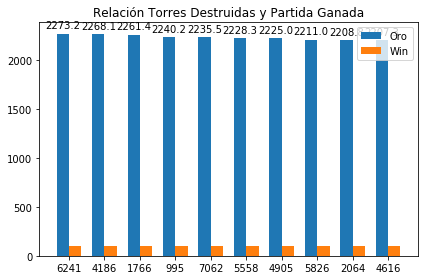

In [236]:
df_gold = dataframe_partidas_lol.sort_values('redGoldPerMin',ascending=False)
df_gold = df_gold.head(10)
df_gold = df_gold.loc[:,['blueWins','redGoldPerMin']]
df_gold.blueWins = df_gold.blueWins.replace({0:1,1:0})


x = np.arange(len(df_gold.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_gold.redGoldPerMin, width, label='Oro')
rects2 = ax.bar(x + width/2, df_gold.blueWins * 100, width, label='Win')
 
ax.set_title('Relación Torres Destruidas y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_gold.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
fig.tight_layout()

plt.show()

#### 19. ¿Cuál es la relación entre ganar un partida y hacer objetivos durante los 10 primero minutos de la partida para el equipo rojo?

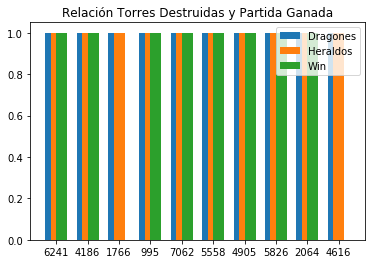

In [235]:
df_obj_win = dataframe_partidas_lol.sort_values(['redDragons','redHeralds'],ascending=False)
df_obj_win = df_obj_win.head(10)
df_obj_win = df_obj_win.loc[:,['blueWins','redDragons','redHeralds']]
df_obj_win.blueWins = df_obj_win.blueWins.replace({0:1,1:0})


x = np.arange(len(df_obj_win.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_obj_win.redDragons, width, label='Dragones')
rects2 = ax.bar(x, df_obj_win.redHeralds, width, label='Heraldos')
rects3 = ax.bar(x + width/2, df_obj_win.blueWins, width, label='Win')
 
ax.set_title('Relación Torres Destruidas y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_gold.index)
ax.legend()

plt.show()

#### 20. ¿Cuál es la relación entre ganar un partida y el CS (Creep Score) del equipo rojo?

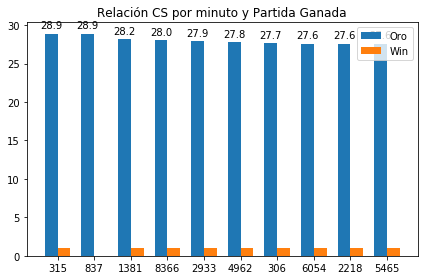

In [234]:
df_cs = dataframe_partidas_lol.sort_values(['redCSPerMin'],ascending=False)
df_cs = df_cs.head(10)
df_cs = df_cs.loc[:,['blueWins','redCSPerMin']]
df_cs.blueWins = df_cs.blueWins.replace({0:1,1:0})


x = np.arange(len(df_cs.index))

width = 0.35
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, df_cs.redCSPerMin, width, label='Oro')
rects2 = ax.bar(x + width/2, df_cs.blueWins, width, label='Win')
 
ax.set_title('Relación CS por minuto y Partida Ganada')
ax.set_xticks(x)
ax.set_xticklabels(df_cs.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
fig.tight_layout()

plt.show()

